In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('Fraud.csv')

## Problem Statement
### Develop a model for predicting fraudulent transactions.

In [ ]:
Data Dictionary
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
amount - amount of the transaction in local currency.
nameOrig - customer who started the transaction
oldbalanceOrg - initial balance before the transaction
newbalanceOrig - new balance after the transaction
nameDest - customer who is the recipient of the transaction
oldbalanceDest - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).
newbalanceDest - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).
isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
*isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
print('No of records in data: ',data.shape[0])
print('No of columns in data: ',data.shape[1])

No of records in data:  6362620
No of columns in data:  11


In [4]:
# Viewing first 10 rows of the data
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
# Viewing last 10 rows of the data
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
# Viewing random 10 rows of the data
data.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2415935,202,CASH_OUT,211705.46,C510416602,59247.00,0.00,C744866757,416423.07,628128.54,0,0
5223691,370,CASH_IN,56732.86,C248050614,24114161.12,24170893.98,C1972684597,6328271.54,6271538.69,0,0
5072926,355,CASH_OUT,355918.90,C559736306,0.00,0.00,C1224070356,1087540.39,1443459.28,0,0
3028214,233,PAYMENT,395.16,C146529195,70.00,0.00,M1583958148,0.00,0.00,0,0
5557393,383,CASH_OUT,114955.22,C838408228,0.00,0.00,C1732919400,1700337.07,1815292.29,0,0
119516,11,CASH_OUT,107284.97,C994942239,329131.96,221846.99,C1167813715,2571681.99,2678966.96,0,0
1853808,164,CASH_OUT,84477.54,C1942518240,185.00,0.00,C817779764,0.00,84477.54,0,0
1354799,137,TRANSFER,59835.98,C1202591978,0.00,0.00,C637302537,175387.80,235223.78,0,0
5195102,369,PAYMENT,10739.65,C188362632,0.00,0.00,M1309972734,0.00,0.00,0,0
794071,40,CASH_OUT,354544.43,C801192230,3093.00,0.00,C93571793,185920.73,540465.16,0,0


In [7]:
# Viewing the list of all the columns in this dataset
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Mathematical look of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
data.describe(include='object').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


CASH_OUT is the most occuring type of transaction
customer C1902386530 has started the most transactions
customer C1286084959 is the top recipient of the transaction

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
# Number of null values in each column
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# Checking for duplicate number of rows in the data
data.duplicated().sum()

0

In [15]:
data.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

In [16]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

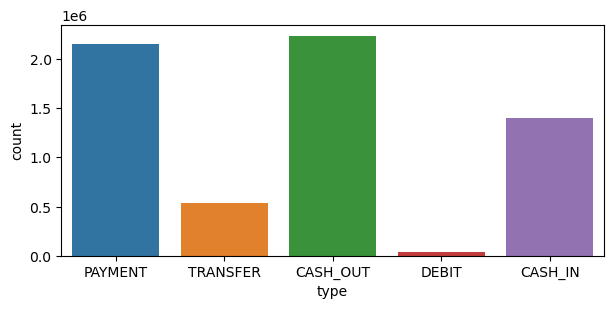

In [24]:
plt.figure(figsize=(7,3))
sns.countplot(data['type'])
plt.show()

In [25]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

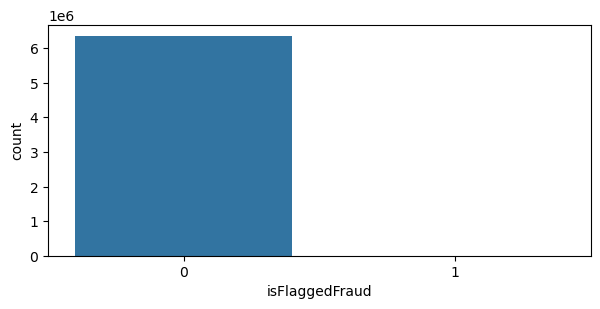

In [26]:
plt.figure(figsize=(7,3))
sns.countplot(data['isFlaggedFraud'])
plt.show()

In [27]:
print('Percentage of fraud transactions: ',(data['isFraud'].value_counts()[0]/len(data))*100)

Percentage of fraud transactions:  99.87091795518198


In [28]:
print('Percentage of non fraud transactions: ',(data['isFraud'].value_counts()[1]/len(data))*100)

Percentage of non fraud transactions:  0.12908204481801522


**This is a highly unbalanced data**

<AxesSubplot:>

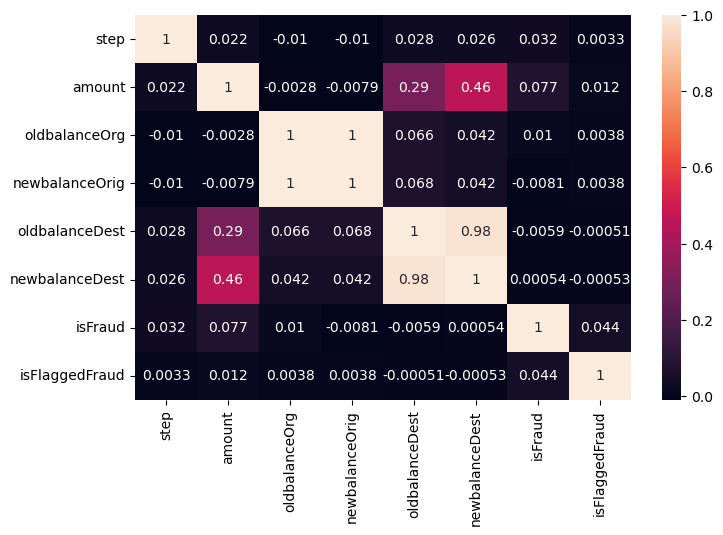

In [36]:
corr=data.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)

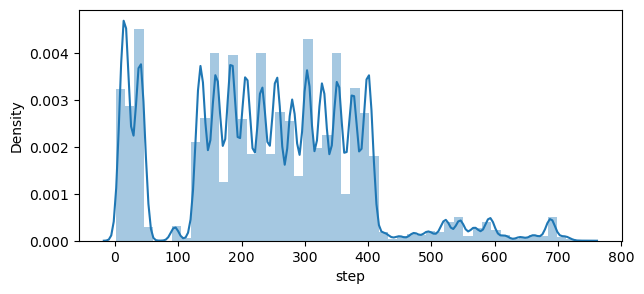

In [30]:
plt.figure(figsize=(7,3))
sns.distplot(data['step'])
plt.show()

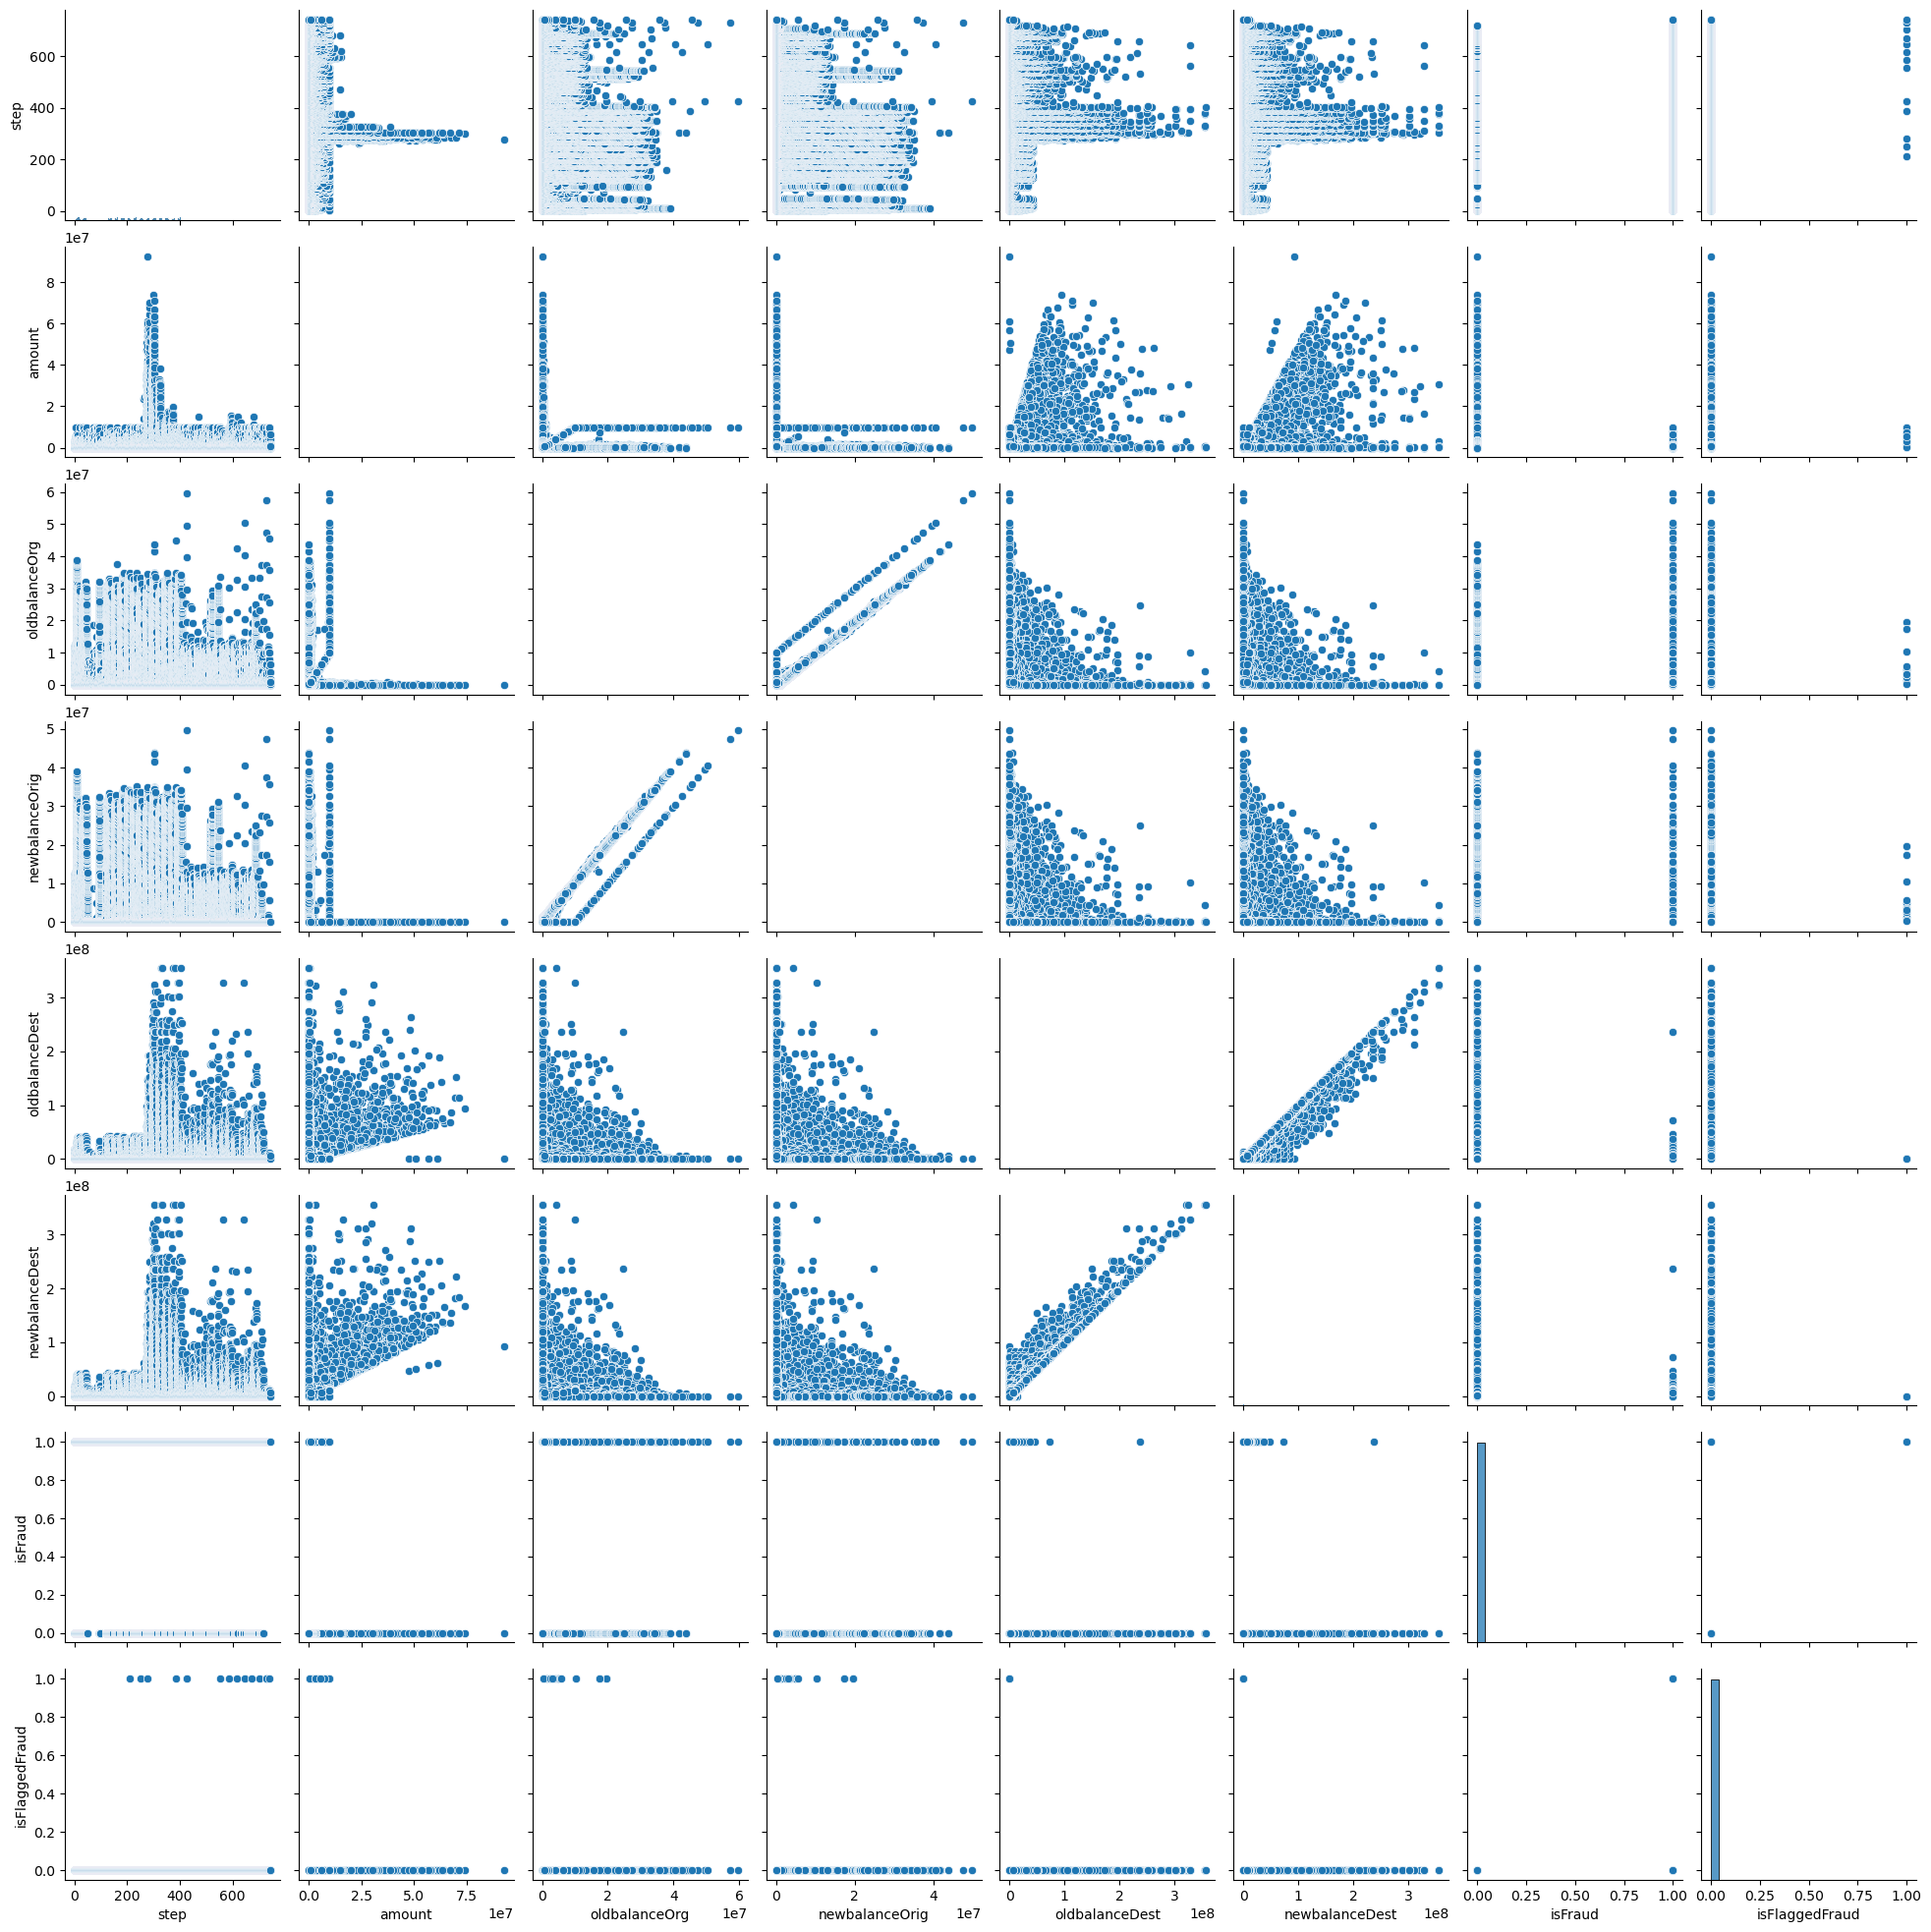

In [53]:
sns.pairplot(data)
plt.show()

In [42]:
# Types of fraudulent transactions
print('The types of fraudulent transactions are: ',list(data.loc[data.isFraud == 1].type.drop_duplicates().values))

The types of fraudulent transactions are:  ['TRANSFER', 'CASH_OUT']


In [46]:
# Are there any merchants among originator accounts for CASH_IN transactions?
print('Are there any merchants among originator accounts for CASH_IN transactions?',\
      (data.loc[data.type == 'CASH_IN'].nameOrig.str.contains('M')).any())
# data does not have merchants making CASH_IN transactions to customers.

Are there any merchants among originator accounts for CASH_IN transactions? False


In [48]:
# Are there any merchants among destination accounts for CASH_OUT transactions?
print('Are there any merchants among destination accounts for CASH_OUT transactions?',\
(data.loc[data.type == 'CASH_OUT'].nameDest.str.contains('M')).any())
# It was stated that CASH_OUT involves paying a merchant.
# However, for CASH_OUT transactions there are no merchants among the destination accounts.

Are there any merchants among destination accounts for CASH_OUT transactions? False


### OUTLIERS

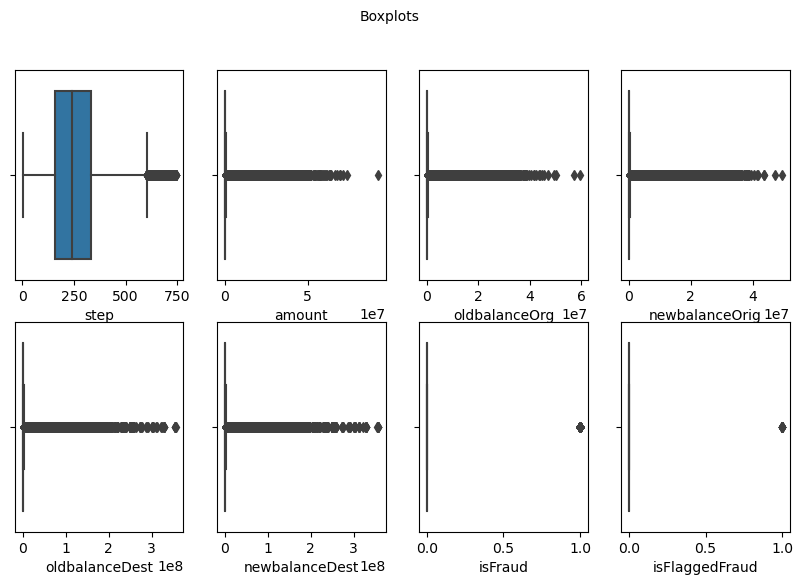

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(10,6))
fig.suptitle('Boxplots',fontsize=10)
sns.boxplot(ax=axes[0,0],data=data,x='step')
sns.boxplot(ax=axes[0,1],data=data, x='amount')
sns.boxplot(ax=axes[0,2],data=data, x='oldbalanceOrg')
sns.boxplot(ax=axes[0,3],data=data, x='newbalanceOrig')
sns.boxplot(ax=axes[1,0],data=data, x='oldbalanceDest')
sns.boxplot(ax=axes[1,1],data=data, x='newbalanceDest')
sns.boxplot(ax=axes[1,2],data=data, x='isFraud')
sns.boxplot(ax=axes[1,3],data=data, x='isFlaggedFraud')
plt.show()

In [3]:
columnsForOutlierDetection=[]
for i in data.columns:
    if(i != 'isFraud' and i != 'isFlaggedFraud'):
        if data[i].dtype != 'O':
            columnsForOutlierDetection.append(i)
columnsForOutlierDetection

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [4]:
summaryBeforeOutlierCorrection = data[columnsForOutlierDetection].describe()  
summaryBeforeOutlierCorrection

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [5]:
for column in columnsForOutlierDetection:
    print(column)
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5*IQR
    LB = Q1 - 1.5*IQR
    # Upper bound operation
    data[column] = np.where(data[column] > UB, UB, data[column])
    # Lower bound operation
    data[column] = np.where(data[column] < LB, LB, data[column])

step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest


In [6]:
summaryAfterOutlierCorrection = data[columnsForOutlierDetection].describe()
summaryAfterOutlierCorrection

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.422653e+02,1.322667e+05,7.221247e+04,8.872275e+04,6.003940e+05,7.150404e+05
std,1.391004e+02,1.462368e+05,1.024141e+05,1.393412e+05,8.369711e+05,9.673665e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,6.035000e+02,5.017193e+05,2.682879e+05,3.606460e+05,2.357592e+06,2.779773e+06


In [7]:
# As fraud only occurs in 'TRANSFER's and 'CASH_OUT' type, so we will keep only these two types and 
# will also remove the irrelevant columns
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
#X.loc[X.type == 'TRANSFER','type'] = 0
#X.loc[X.type == 'CASH_OUT','type'] = 1
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
Y = X['isFraud']
del X['isFraud']
X = pd.get_dummies(X,drop_first=True)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=123)

In [9]:
X_train.shape

(1939286, 7)

In [10]:
X_test.shape

(831123, 7)

In [11]:
Y_train.shape

(1939286,)

In [12]:
Y_test.shape

(831123,)

In [13]:
tempMaxVIF = 5 # The VIF that will be calculated at EVERY iteration in while loop
maxVIFCutoff = 5 # 5 is recommended cutoff value for linear regression
trainXCopy = X_train.copy()
counter = 1
highVIFColumnNames = []

In [14]:
while (tempMaxVIF >= maxVIFCutoff):   
    print(counter)
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])] 
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,1]
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,0]
    # tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]   
    print(tempColumnName)
  
    if (tempMaxVIF >= maxVIFCutoff): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1

highVIFColumnNames

1
newbalanceDest
2
amount


['newbalanceDest']

In [15]:
X_train = X_train.drop(highVIFColumnNames, axis = 1)
X_test = X_test.drop(highVIFColumnNames, axis = 1)

In [16]:
X_train.shape

(1939286, 6)

In [17]:
X_test.shape

(831123, 6)

In [18]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")), ('std_sacaler',StandardScaler())])

In [19]:
X_train_tr=num_pipeline.fit_transform(X_train)
X_test_tr=num_pipeline.fit_transform(X_test)

In [20]:
X_train=pd.DataFrame(data=X_train_tr,columns=X_train.columns)
X_test=pd.DataFrame(data=X_test_tr,columns=X_test.columns)

In [21]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_sacaler', StandardScaler())])

In [22]:
def Model_Result(actual,pred):
    print("Confusion Matrix")
    confusion=confusion_matrix(actual,pred)
    print(confusion)
    print("**********************************************************")
    print('Accuracy -',accuracy_score(actual,pred))
    print("Recall -",recall_score(actual,pred))
    print("Precision -",precision_score(actual,pred))
    print("F1 Score -",f1_score(actual,pred))
    print("Classificaiton Report\n" ,classification_report(actual,pred))
    
    Mat= [accuracy_score(actual,pred),recall_score(actual,pred),precision_score(actual,pred),f1_score(actual,pred)]
    return Mat

In [23]:
validation_dict={}
def different_model(model):
    ml=model  
    ml.fit(X_train,Y_train)
    pred_y = ml.predict(X_test)
    return_list=Model_Result(Y_test,pred_y)
    validation_dict[model]=return_list

In [140]:
# Logistics regression
different_model(LogisticRegression(random_state=123))

Confusion Matrix
[[828479     91]
 [  2237    316]]
**********************************************************
Accuracy - 0.9971989705494855
Recall - 0.12377594986290638
Precision - 0.7764127764127764
F1 Score - 0.21351351351351353
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828570
           1       0.78      0.12      0.21      2553

    accuracy                           1.00    831123
   macro avg       0.89      0.56      0.61    831123
weighted avg       1.00      1.00      1.00    831123



In [141]:
# DecisionTreeClassifier
different_model(DecisionTreeClassifier(random_state=123))

Confusion Matrix
[[827757    813]
 [   720   1833]]
**********************************************************
Accuracy - 0.99815550766854
Recall - 0.717978848413631
Precision - 0.6927437641723356
F1 Score - 0.7051356030005771
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828570
           1       0.69      0.72      0.71      2553

    accuracy                           1.00    831123
   macro avg       0.85      0.86      0.85    831123
weighted avg       1.00      1.00      1.00    831123



In [142]:
# RandomForestClassifier
different_model(RandomForestClassifier(random_state=123))

Confusion Matrix
[[828086    484]
 [   859   1694]]
**********************************************************
Accuracy - 0.9983841140240374
Recall - 0.6635330983157071
Precision - 0.7777777777777778
F1 Score - 0.7161276685690129
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828570
           1       0.78      0.66      0.72      2553

    accuracy                           1.00    831123
   macro avg       0.89      0.83      0.86    831123
weighted avg       1.00      1.00      1.00    831123



In [144]:
# KNeighborsClassifier
different_model(KNeighborsClassifier())

Confusion Matrix
[[828168    402]
 [  1072   1481]]
**********************************************************
Accuracy - 0.9982264959578787
Recall - 0.5801018409714062
Precision - 0.786510886882634
F1 Score - 0.6677186654643823
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828570
           1       0.79      0.58      0.67      2553

    accuracy                           1.00    831123
   macro avg       0.89      0.79      0.83    831123
weighted avg       1.00      1.00      1.00    831123



In [26]:
# Naive Bayes
different_model(GaussianNB())

Confusion Matrix
[[822987   5583]
 [  1200   1353]]
**********************************************************
Accuracy - 0.9918387531087456
Recall - 0.5299647473560517
Precision - 0.19506920415224913
F1 Score - 0.2851723047739488
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    828570
           1       0.20      0.53      0.29      2553

    accuracy                           0.99    831123
   macro avg       0.60      0.76      0.64    831123
weighted avg       1.00      0.99      0.99    831123



In [28]:
# LDA
different_model(LinearDiscriminantAnalysis())

Confusion Matrix
[[812547  16023]
 [   874   1679]]
**********************************************************
Accuracy - 0.9796696758482198
Recall - 0.6576576576576577
Precision - 0.09484803976951757
F1 Score - 0.1657862256233029
Classificaiton Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    828570
           1       0.09      0.66      0.17      2553

    accuracy                           0.98    831123
   macro avg       0.55      0.82      0.58    831123
weighted avg       1.00      0.98      0.99    831123



### Final model

In [29]:
Model=RandomForestClassifier(random_state=123)
m=Model.fit(X_train,Y_train)

In [31]:
Test_Pred=m.predict(X_test)
print(classification_report(Y_test, Test_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828570
           1       0.78      0.66      0.72      2553

    accuracy                           1.00    831123
   macro avg       0.89      0.83      0.86    831123
weighted avg       1.00      1.00      1.00    831123

